<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

# NumPy 陣列的基本操作

## 安裝與載入 NumPy

安裝 NumPy 可以使用 `pip install numpy` 或是 `pip3 install numpy`，在 Anaconda 環境下的話，執行 `conda install numpy` 進行安裝。

In [1]:
!pip3 install numpy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


載入 NumPy

In [2]:
import numpy as np

目前安裝的 NumPy 版本

In [3]:
np.__version__

'1.18.5'

---
## 1. 建立 NumPy array (陣列)

### 1.1 `array()` 函式

使用 `array()` 函式，可將 Python list 或元組 (tuple) 的值建立為 NumPy array。

In [6]:
# 使用 list
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [7]:
# 使用元組
b = np.array((6, 7, 8))
b

array([6, 7, 8])

可以看到建立的陣列型別為 numpy.ndarray

In [8]:
type(a), type(b)

(numpy.ndarray, numpy.ndarray)

下列的語法則會造成錯誤

In [9]:
np.array(1, 2, 3)

ValueError: only 2 non-keyword arguments accepted

---
### 1.2 使用 `arange()` 與 `linspace()` 函式產生等差一維陣列

要用序列數字產生陣列元素的話，可以使用 `arange()` 函式，`arange()` 函式引數如下，其中結束值為必輸，起始值、間隔值非必輸。產生的序列數字包含起始值但不包含結束值，也就是 `[start, stop)` 的表示方式。

```python
numpy.arange([start, ]stop, [step, ]dtype=None)
```

產生的元素，會是依照起始值、結束值、間隔值做等差的數字序列。

NumPy 陣列支援的資料型別 (dtype) 如下表：

||型別|
|---|---|
|signed 整數|int8, int16, int32, int64|
|unsigned 整數|uint8, uint16, uint32, uint64|
|浮點數|float16, float32, float64, float128|
|布林值|bool|

In [10]:
# 產生 0 - 9 十個數字元素
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# 產生 2, 4, 6, 8 數字元素
np.arange(2, 10, 2)

array([2, 4, 6, 8])

下例是浮點數序列的示範。

In [12]:
np.arange(1.0, 3.0, 0.5, dtype='float64')

array([1. , 1.5, 2. , 2.5])

當在 `arange()` 使用非整數的間隔值時，有可能會產生不一致的結果

如下例，有時會包含結束值但有時候不會。這時候可以考慮使用 `linspace()` 函式。

In [13]:
a = np.arange(0.13, 0.16, step=0.01)
print("沒有包含結束值：", a)

b = np.arange(0.12, 0.16, step=0.01)
print("包含結束值：", b)

沒有包含結束值： [0.13 0.14 0.15]
包含結束值： [0.12 0.13 0.14 0.15 0.16]


In [15]:
b = np.arange(0.12, 0.16, step=0.005)
b

array([0.12 , 0.125, 0.13 , 0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 ])

跟 `arange()` 的用法很類似，呼叫 `linspace()` 時的引數有啟始值、結束值、資料型別 `dtype`。

與 `arange()` 不同的地方在於起始跟結束值都是必輸，產生該範圍內等分的數值，另外對於產生的元素也可以有更多的控制：
- `num`：產生元素數
- `endpoint`:是否包含結束值
- `retstep`：是否要顯示間隔值，間隔值是依照啟始值、結束值、產生元素數計算而得
- `axis`：產生依據的軸

`linspace()` 函式的定義：

```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
```

下面 `linspace()` 的例子跟上面 `arange()` 的例子會有完全相同的產出。
```python
np.arange(2, 10, 2)
```

In [18]:
b = np.arange(0.13, 0.16, step=0.005)
b

array([0.13 , 0.135, 0.14 , 0.145, 0.15 , 0.155])

In [19]:
np.linspace(2, 10, num=4, endpoint=False)

array([2., 4., 6., 8.])

In [20]:
# 顯示間值值
np.linspace(2.0, 3.0, num=5, retstep=True)

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

---
### 1.3 建立多維陣列

要建立多維陣列，簡單的理解方式就是陣列中的元素也是陣列，呼叫 `array()` 函式時，只要將 list 中的元素也是 list 傳入即可。下面的例子是建立二維陣列。

In [21]:
a = np.array([[1, 2, 3], [4, 5, 6]])

使用 `print()` 函式可將陣列印出

In [22]:
print(a)

[[1 2 3]
 [4 5 6]]


使用 `shape` 屬性，可以查看多維陣列的形狀。如下例 a 陣列是一個 2 $\times$ 3 的二維陣列。

In [23]:
a.shape

(2, 3)

下列例子是建立三維陣列，也可以理解為 2 個 4 $\times$ 3 的二維陣列排在一起。

In [24]:
b = np.array([[[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]],
              [[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]]])

In [25]:
print(b)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]]


In [26]:
b.shape

(2, 4, 3)

要查看多維陣列的維度數目，可以查看陣列的 `ndim` 屬性。

In [27]:
b.ndim

3

多維陣列建立時須注意各維度是否一致，否則如下例會產生預期之外的結果。

In [28]:
np.array([[[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]],
              [[1, 2, 3], [4, 5, 6]]])

array([list([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]),
       list([[1, 2, 3], [4, 5, 6]])], dtype=object)

---
### 1.4 `zeros()`、`ones()`、`empty()`

呼叫 `zeros()`、`ones()`函式，可以依照傳入的形狀引數，建立元素全為 0、全為 1 的陣列。

`empty()` 則是不需要給定起始值，但是可以建立給定形狀的陣列，元素值則會隨機給定。

In [29]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [31]:
np.empty((2, 2, 2))

array([[[0.13 , 0.135],
        [0.14 , 0.145]],

       [[0.15 , 0.155],
        [0.16 , 0.165]]])

---
### 1.5 使用隨機函式產生陣列的元素

下列是常用的函式及簡介：

|函式|說明|產生數值區間|隨機數資料型別|隨機數分佈|
|---|---|---|---|---|
|rand()|隨機產生指定形狀(shape)的陣列|[0, 1)|浮點數|連續型均勻分布|
|randn()|隨機產生指定形狀(shape)的陣列|(-1, 1)|浮點數|常態分佈|
|randint((low[, high, size, dtype]))|隨機產生設定區間元素|[low, high)|整數|離散型均勻分布|
|random_sample([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|random([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|randf([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|sample([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|

In [33]:
# 設定隨機種子
np.random.seed(42)

#### 1.5.1 隨機產生指定形狀的陣列

In [34]:
np.random.rand(2, 3)   # [0, 1) 連續型均勻分布

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

In [35]:
np.random.randn(2, 3)  # (-1, 1)常態分佈

array([[ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

#### 1.5.2 隨機產生一維陣列的元素

In [36]:
np.random.random(10)

array([0.30424224, 0.52475643, 0.43194502, 0.29122914, 0.61185289,
       0.13949386, 0.29214465, 0.36636184, 0.45606998, 0.78517596])

In [37]:
np.random.randint(1, 10, 10)  # (low, high, size)

array([3, 7, 4, 9, 3, 5, 3, 7, 5, 9])

In [38]:
np.random.random_sample(10)

array([0.06505159, 0.94888554, 0.96563203, 0.80839735, 0.30461377,
       0.09767211, 0.68423303, 0.44015249, 0.12203823, 0.49517691])

In [48]:
np.random.choice(100, 10)   # 同 randint(0, 100, 10)

array([41, 76, 50, 62, 95, 51, 95,  3, 93, 22])

---
### 1.6 隨機產生不同分佈的陣列元素

隨機陣列也可以產生不同分佈的元素，NumPy 提供的函式和分佈非常豐富，所有函式與詳細說明可以參考官方文件 [Random sampling - Distributions](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions)。

以 Gamma 分佈為例。

【註】若尚未安裝 Matplotlib 及 SciPy 的話，執行下面範例前請先安裝。

In [52]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
len(s), s[:100]

(1000,
 array([ 1.58553923,  1.68121515,  9.4733707 ,  5.69917088,  0.93248843,
         5.13763355,  0.72122754,  6.76398474,  5.41686069,  7.74426634,
         2.84316994,  2.6634455 ,  0.55709857,  0.30927382,  7.64343287,
         2.19709797,  0.57802972,  1.22868438,  0.6840403 ,  2.56625472,
         3.3707771 ,  5.28866142,  2.03550917,  3.86091682,  6.73743193,
         1.36733836,  0.21399859,  5.38266235, 14.87221761,  3.31437974,
         3.8823769 ,  3.13656958,  2.87445828,  0.99490241,  6.16980105,
         2.02737332,  1.39579833,  4.77918578,  3.41015768,  4.21333227,
         1.90422708,  1.21750229,  1.08884312,  4.0803729 ,  2.43956484,
         1.68919944,  3.75764653,  0.98390329,  3.12079195,  7.9555481 ,
        15.54373832,  5.38475542,  7.39733114,  3.68211542,  2.24520568,
         1.63524944,  3.36168045,  1.66935171,  1.43692768,  0.37115427,
         3.58305837,  2.75815635,  3.68224381, 11.91412996,  1.17813079,
         1.63851184,  6.37157632,  7.0315452

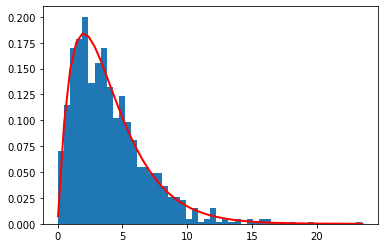

In [55]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.special as sps

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

---
## 2. NumPy 陣列的索引和切片 (Slicing)

透過索引存取陣列元素或進行切片 (slicing)，可以使用索引值，或是 [start:stop:step] 語法取得範圍內的元素，要留意的是起始-結束範圍仍是 half-open 的，所以回傳的元素將不包含結束索引的元素。

In [56]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [57]:
a[3]

3

In [58]:
a[5:10]

array([5, 6, 7, 8, 9])

In [59]:
a[5:10:2]

array([5, 7, 9])

索引 -1 表示取得最後一個元素。

In [60]:
a[-1]

19

切片如果只有給定 step 值為 -1 的話，則代表是反向取出，元素值是從最後一筆開始取出。

In [61]:
a[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

多維陣列的索引是分別給定各維度的索引值或範圍。

In [62]:
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
b[0]

array([1, 2, 3])

In [63]:
b[0, 2]

3

若沒有給定 start 或 stop 值的話則代表是取出該索引之前或之後的所有元素。若 start 和 stop 值都沒有給定的話，就是取出所有元素值。

In [68]:
b[:, :1]

array([[1],
       [4]])

In [69]:
b[:, 1:]

array([[2, 3],
       [5, 6]])

---
## 3. NumPy 陣列的常用屬性

|屬性|說明|
|---|---|
|shape|陣列的形狀|
|ndim|陣列的維度數目，也就是軸(axis)的數目|
|dtype|陣列元素的資料型別|
|size|陣列元素的數目|
|flat|陣列的一維迭代器|
|T|陣列轉置|
|real|陣列元素複數(complex number)的實數部分|
|imag|陣列元素複數(complex number)的虚數部分|
|data|顯示buffer物件，指向陣列資料的開始位址|
|itemsize|每個元素的記憶體使用量|
|nbytes|陣列所有元素的記憶體使用量|
|strides|往相鄰元素移動時需要的byte數|

a 陣列為二維陣列，陣列形狀、維度、元素數目可透過屬性查看。

In [70]:
a = np.array([[1, 2, 3, 4, 5],
              [4, 5, 6, 7, 8]])

In [71]:
a.shape

(2, 5)

In [72]:
a.ndim

2

In [73]:
a.dtype

dtype('int64')

In [74]:
a.size

10

若將 a 陣列透過一維迭代器來查看的話，索引 6 的元素值將是 5。

In [75]:
a.flat[6]

5

In [76]:
a.flat[8]

7

轉置 (transpose) 陣列，將會在後續線性代數的單元有更多的介紹。

In [77]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6],
       [4, 7],
       [5, 8]])

In [78]:
a = a.T
a.shape

(5, 2)

x 陣列的元素為複數 (complex number)，查看 `real` 與 `imag` 屬性分別顯示數字的實部與虚部。

In [82]:
x = np.array([1+2j, 3+4j])
x

array([1.+2.j, 3.+4.j])

In [83]:
x.real

array([1., 3.])

In [84]:
x.imag

array([2., 4.])

顯示buffer物件，指向陣列資料的開始位址

In [85]:
x.data

b 陣列的資料型別為 `int64` 64 bit 的整數，也就是 8 byte，陣列有 3 個元素所以陣列的 `dtype`、`itemsize`、`nbytes`、`strides` 元範及結果如下。

In [86]:
b = np.array([1, 2, 3])

In [87]:
b.dtype    # dtype 一個佔 8 bit

dtype('int64')

In [88]:
b.itemsize # 每個元素的記憶體使用量

8

In [89]:
b.nbytes   # 陣列所有元素的記憶體使用量

24

In [90]:
b.strides  # 往相鄰元素移動時需要的byte數

(8,)

---

In [100]:
c = np.array([1, 2, 3], dtype='int32')
c.dtype, c.itemsize, c.nbytes, c.strides  

(dtype('int32'), 4, 12, (4,))